In [35]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import losses, optimizers
from keras.utils.vis_utils import plot_model

In [36]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [92]:
from sklearn import preprocessing
from sklearn import datasets
from sklearn import model_selection
from sklearn import metrics

In [38]:
# Ucitavanje podataka
p = pd.read_csv('flights_small.csv', low_memory=False)

In [39]:
p

,Unnamed: 0,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DELAY
0,0,2015,1,1,4,NK,943,N605NK,ACY,RSW,...,86.0,0,0,NaN,86.0,0.0,0.0,0.0,0.0,True
1,1,2015,1,1,4,NK,316,N601NK,DTW,LGA,...,58.0,0,0,NaN,58.0,0.0,0.0,0.0,0.0,True
2,2,2015,1,1,4,MQ,3432,N546MQ,DCA,JFK,...,161.0,0,0,NaN,0.0,46.0,115.0,0.0,0.0,True
3,3,2015,1,1,4,UA,572,N404UA,AUS,IAH,...,20.0,0,0,NaN,0.0,0.0,20.0,0.0,0.0,True
4,4,2015,1,1,4,UA,284,N832UA,PHX,SFO,...,48.0,0,0,NaN,0.0,0.0,0.0,0.0,48.0,True
5,5,2015,1,1,4,AS,531,N529AS,BUR,SEA,...,120.0,0,0,NaN,0.0,0.0,0.0,0.0,120.0,True
6,6,2015,1,1,4,B6,2784,N283JB,RDU,BOS,...,21.0,0,0,NaN,21.0,0.0,0.0,0.0,0.0,True
7,7,2015,1,1,4,OO,6200,N748SK,ORF,ORD,...,16.0,0,0,NaN,16.0,0.0,0.0,0.0,0.0,True
8,8,2015,1,1,4,DL,2494,N711ZX,JFK,MSP,...,27.0,0,0,NaN,0.0,0.0,27.0,0.0,0.0,True
9,9,2015,1,1,4,NK,218,N622NK,FLL,ACY,...,18.0,0,0,NaN,18.0,0.0,0.0,0.0,0.0,True


In [40]:
p.columns

Index(['Unnamed: 0', 'YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE',
       'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'DELAY'],
      dtype='object')

In [41]:
air_sys_delay = p['AIR_SYSTEM_DELAY']

In [42]:
mis_val_percent = 100 * air_sys_delay.isnull().sum() / len(p) 

In [43]:
mis_val_percent # Procenat NaN vrednosti za parametar AIR_SYSTEM_DELAY

49.597484514992516

In [44]:
# Slicna situacija je i sa ostalim parametrima za delay jer imaju vrednosti samo kad jeste kasnio let
# tako da se te vrednosti ne mogu koristiti za klasifikaciju

# Biramo atribute za klasifikaicju 

In [95]:
x = p[['MONTH', 'DAY', 'DAY_OF_WEEK', 'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY', 'TAXI_OUT', 'DISTANCE', 'SCHEDULED_ARRIVAL']]

In [96]:
x

,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,TAXI_OUT,DISTANCE,SCHEDULED_ARRIVAL
0,1,1,4,600,102.0,10.0,982,851
1,1,1,4,600,-2.0,11.0,502,738
2,1,1,4,615,164.0,10.0,213,718
3,1,1,4,630,28.0,18.0,140,731
4,1,1,4,650,61.0,27.0,651,804
5,1,1,4,700,124.0,10.0,937,930
6,1,1,4,700,-13.0,45.0,612,849
7,1,1,4,720,-1.0,28.0,717,840
8,1,1,4,800,35.0,26.0,1029,1023
9,1,1,4,800,15.0,12.0,977,1025


In [97]:
y = p[['DELAY']]

In [98]:
# Podela podataka na trening i test skup
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.33, random_state = 7)

In [99]:
x_train.shape

(70742, 8)

In [100]:
y_train.shape

(70742, 1)

In [101]:
number_of_features = x_train.shape[1]
output_size = 1

In [102]:
# Pretprocesiranje
scaler = preprocessing.StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [53]:
# Neuronska mreza za klasifikaciju

In [54]:
model = Sequential()

In [55]:
model.add(Dense(units= 50, input_dim = number_of_features, activation = 'relu'))

In [56]:
model.add(Dense(units=40, activation='relu'))

In [57]:
model.add(Dense(units = output_size, activation='sigmoid'))

In [58]:
model.compile(optimizer='adam', loss=losses.binary_crossentropy, metrics=['accuracy'])

In [59]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 50)                450       
_________________________________________________________________
dense_6 (Dense)              (None, 40)                2040      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 41        
Total params: 2,531
Trainable params: 2,531
Non-trainable params: 0
_________________________________________________________________


In [60]:
# Obucavanje modela
history = model.fit(x_train, y_train, epochs= 30, batch_size=16, verbose=1, validation_split=0.3)

Train on 49519 samples, validate on 21223 samples
Epoch 1/30
49519/49519 [==============================] - 4s 81us/step - loss: 0.2568 - acc: 0.8978 - val_loss: 0.2392 - val_acc: 0.9066
Epoch 2/30
49519/49519 [==============================] - 4s 76us/step - loss: 0.2371 - acc: 0.9055 - val_loss: 0.2359 - val_acc: 0.9076
Epoch 3/30
49519/49519 [==============================] - 4s 76us/step - loss: 0.2355 - acc: 0.9073 - val_loss: 0.2371 - val_acc: 0.9063
Epoch 4/30
49519/49519 [==============================] - 4s 77us/step - loss: 0.2343 - acc: 0.9072 - val_loss: 0.2360 - val_acc: 0.9076
Epoch 5/30
49519/49519 [==============================] - 4s 76us/step - loss: 0.2333 - acc: 0.9082 - val_loss: 0.2364 - val_acc: 0.9077
Epoch 6/30
49519/49519 [==============================] - 4s 78us/step - loss: 0.2329 - acc: 0.9073 - val_loss: 0.2339 - val_acc: 0.9092
Epoch 7/30
49519/49519 [==============================] - 4s 76us/step - loss: 0.2324 - acc: 0.9084 - val_loss: 0.2356 - val_acc

In [61]:
epochs = history.epoch

In [62]:
loss = history.history['loss']
validation_loss = history.history['val_loss']

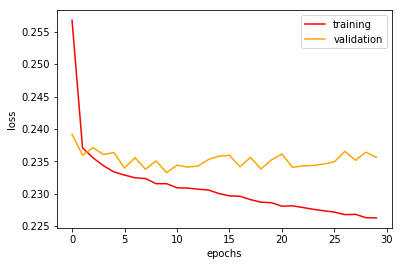

In [63]:
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(epochs, loss, c='red', label='training')
plt.plot(epochs, validation_loss, c='orange', label='validation')
plt.legend(loc='best')
plt.show()

In [64]:
acc = history.history['acc']
validation_acc = history.history['val_acc']

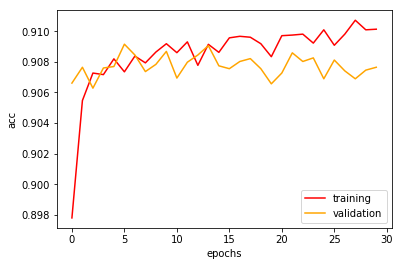

In [65]:
plt.xlabel('epochs')
plt.ylabel('acc')
plt.plot(epochs, acc, c='red', label='training')
plt.plot(epochs, validation_acc, c='orange', label='validation')
plt.legend(loc='best')
plt.show()

In [66]:
# Evaluacija mreze
test_loss, test_acc = model.evaluate(x_test, y_test)
print ("Test loss: {}, test accuracy: {}".format(test_loss, test_acc))

34844/34844 [==============================] - 0s 14us/step
Test loss: 0.2368030217057623, test accuracy: 0.9059235449637026


In [67]:
# Doslo je do preprilagodjavanja, vidimo da su nam rezultati za validacioni skup znatno losiji od trening skupa
# Broj epoha - 4

In [103]:
model = Sequential()

In [104]:
model.add(Dense(units= 50, input_dim = number_of_features, activation = 'relu'))

In [105]:
model.add(Dense(units=40, activation='relu'))

In [106]:
model.add(Dense(units = output_size, activation='sigmoid'))

In [107]:
model.compile(optimizer='adam', loss=losses.binary_crossentropy, metrics=['accuracy'])

In [108]:
history = model.fit(x_train, y_train, epochs= 4, batch_size=16, verbose=1, validation_split=0.3)

Train on 49519 samples, validate on 21223 samples
Epoch 1/4
49519/49519 [==============================] - 5s 93us/step - loss: 0.2585 - acc: 0.8973 - val_loss: 0.2365 - val_acc: 0.9075
Epoch 2/4
49519/49519 [==============================] - 4s 84us/step - loss: 0.2361 - acc: 0.9064 - val_loss: 0.2357 - val_acc: 0.9081
Epoch 3/4
49519/49519 [==============================] - 4s 88us/step - loss: 0.2348 - acc: 0.9073 - val_loss: 0.2344 - val_acc: 0.9091
Epoch 4/4
49519/49519 [==============================] - 4s 80us/step - loss: 0.2341 - acc: 0.9075 - val_loss: 0.2352 - val_acc: 0.9084


In [109]:
epochs = history.epoch
loss = history.history['loss']
validation_loss = history.history['val_loss']

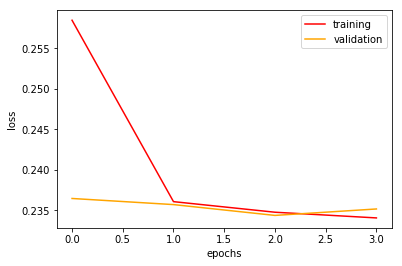

In [111]:
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(epochs, loss, c='red', label='training')
plt.plot(epochs, validation_loss, c='orange', label='validation')
plt.legend(loc='best')
plt.show()

In [112]:
acc = history.history['acc']
validation_acc = history.history['val_acc']

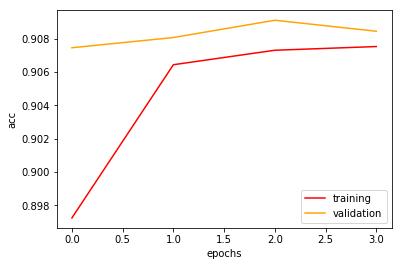

In [113]:
plt.xlabel('epochs')
plt.ylabel('acc')
plt.plot(epochs, acc, c='red', label='training')
plt.plot(epochs, validation_acc, c='orange', label='validation')
plt.legend(loc='best')
plt.show()

In [114]:
y_test_predicted = model.predict(x_test)

In [122]:
y_test_predicted = (y_test_predicted > 0.5)
y_test_predicted

array([[False],
       [ True],
       [False],
       ..., 
       [False],
       [False],
       [False]], dtype=bool)

In [123]:
# Evaluacija mreze
test_loss, test_acc = model.evaluate(x_test, y_test)
print ("Test loss: {}, test accuracy: {}".format(test_loss, test_acc))

34844/34844 [==============================] - 1s 16us/step
Test loss: 0.23772014975000394, test accuracy: 0.906526231222456


In [79]:
# Neuronska mreza za regresiju

In [125]:
x1 = p[['MONTH', 'DAY', 'DAY_OF_WEEK', 'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY', 'TAXI_OUT', 'DISTANCE', 'SCHEDULED_ARRIVAL']]
y1 = p[['ARRIVAL_DELAY']]

In [126]:
x_train1, x_test1, y_train1, y_test1 = model_selection.train_test_split(x1, y1, test_size = 0.33, random_state = 7)

In [127]:
scaler = preprocessing.StandardScaler()
scaler.fit(x_train1)
x_train1 = scaler.transform(x_train1)
x_test1 = scaler.transform(x_test1)

In [128]:
model2 = Sequential()

In [129]:
model2.add(Dense(units = 100, input_dim = number_of_features, activation = 'relu'))

In [130]:
model2.add(Dense(units = output_size))

In [131]:
model2.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [132]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 100)               900       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 101       
Total params: 1,001
Trainable params: 1,001
Non-trainable params: 0
_________________________________________________________________


In [133]:
history2 = model2.fit(x_train1, y_train1, epochs= 10, batch_size=16, verbose=1, validation_split=0.3)

Train on 49519 samples, validate on 21223 samples
Epoch 1/10
49519/49519 [==============================] - 3s 70us/step - loss: 970.6759 - acc: 0.0305 - val_loss: 169.6156 - val_acc: 0.0399
Epoch 2/10
49519/49519 [==============================] - 3s 66us/step - loss: 159.1780 - acc: 0.0400 - val_loss: 161.3927 - val_acc: 0.0423
Epoch 3/10
49519/49519 [==============================] - 3s 67us/step - loss: 155.8629 - acc: 0.0398 - val_loss: 160.4528 - val_acc: 0.0424
Epoch 4/10
49519/49519 [==============================] - 3s 68us/step - loss: 155.1741 - acc: 0.0414 - val_loss: 160.0518 - val_acc: 0.0407
Epoch 5/10
49519/49519 [==============================] - 3s 69us/step - loss: 154.6437 - acc: 0.0411 - val_loss: 159.8963 - val_acc: 0.0427
Epoch 6/10
49519/49519 [==============================] - 3s 67us/step - loss: 154.6739 - acc: 0.0399 - val_loss: 159.7409 - val_acc: 0.0420
Epoch 7/10
49519/49519 [==============================] - 3s 68us/step - loss: 154.4243 - acc: 0.0414 - 

In [98]:
# Previse los model, premala preciznost

In [134]:
recall = metrics.recall_score(y_test, y_test_predicted)

In [136]:
precision = metrics.precision_score(y_test, y_test_predicted)

In [138]:
f1 = metrics.f1_score(y_test, y_test_predicted)